<img src="Legends_of_Runeterra_Cover_01.jpg" alt="Drawing" style="width: 300px;"/>

<h1 align=center><font size = 5>Sentiment Analysis for Riot Games Legend of Runeterra</font></h1>
<h1 align=center><font size = 3><em>Munish Kumar</em></font></h1>

Legends of Runeterra (or LoR) is a card game developed by Riot Games. Set in the world of League of Legends, Legends of Runeterra is the strategy card game where choices made and risks taken determine winners or losers.

Riot games prides itself in being all about the player. This is, in fact, embodied in its mision statement, which is "Player Experience First". However, for a vision to be held to, there must be a report card of sorts. Forums like Reddit are thus well placed to provide feedback to companies like Riot Games as to how their game is being perceived by the community.

ALthough far from ideal, sentiment analysis is one way to "discritize" the sentiments of the public. In order to do this, I will do the following analysis steps:
1. Scrape the most popular message board for player comments
2. Perform Sentiment Analysis using Python Natural Language Toolkit (NTLK)
3. Interpret the results and explain the observations

#### Import Libraries

In [1]:
from IPython import display
import os
import math
import time
from pprint import pprint #"pretty-print" JSON and lists
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

print("Libraries imported.")

Libraries imported.


In [2]:
# Start, test
start = time.time()

In [3]:
# Global Variables
dir_name = 'C:/Users/quant/Anaconda3/@Projects/Sentiment'
filename_suffix = 'csv'

#### Function to do Plotting

In [4]:
def plot_figures(df):
    ncols = 2
    fig, axes = plt.subplots(ncols=ncols)
    fig.set_figwidth(10)
    bins=21
    
    sns.distplot(df['compound'], hist = True,
                 bins=bins, ax=axes[0], color = 'r',
                hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':0.8})
    axes[0].set_title('Linear Bins')
    axes[0].set_xlim(-1.1,1.1)
    
    dfplot = df[df['compound'] !=0]
    
    sns.distplot(dfplot['compound'], hist = True,
                 bins=bins, ax=axes[1], color = 'orange',
                hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':0.8})
    axes[1].set_title('Linear Bins (minus 0)')
    axes[1].set_xlim(-1.1,1.1)
    return

#### Function to convert 'compound' scores after sentiment analysis from weighted average to -1 (negative setiment) or +1 (positive sentiment) for further quantification

In [5]:
def bool_sent(df, quant):
    df['Plus_Minus'] = 0
    
    for i in range(len(df['compound'])): 
        if df['compound'][i] > 1*quant:
            df['Plus_Minus'][i] = 1
        elif df['compound'][i] < -1*quant:
            df['Plus_Minus'][i] = -1
    return df

#### Function to do a Sentiment Count

In [6]:
def sentiment_count(df):
    print("Count of Sentiments:\n")
    print(df['Plus_Minus'].value_counts())
    print("\n")
    print("Count of Sentiments (%):\n")
    print(df['Plus_Minus'].value_counts(normalize = True)*100)
    return

#### Function to do a frequency of Most Common Word

In [139]:
def post_words(df, no_words, check_no):    
    plus_pos_tokens=[None]*df['Plus_Minus'].shape[0]
    ppos_tokens = []
    
    for i in range(df['Plus_Minus'].shape[0]):
        if df['Plus_Minus'][i] == check_no:
            plus_pos_tokens[i] = df['Measure'][i]
            
    for val in plus_pos_tokens:
        if val != None:
            ppos_tokens.append(val)
    
    pos_freq = nltk.FreqDist(ppos_tokens)
    return pos_freq.most_common(no_words)    

#### Checkpoint function

In [7]:
def checkpt(fname,df):
    # Write out the table as a csv as a checkpoint file
    base_filename = fname
    csvs_sht = os.path.join(dir_name, base_filename + "." + filename_suffix)
    df.to_csv(csvs_sht, index = False, header=True)
    
    # A bit hackish, but I will read in the file I just produced, 
    # drop the duplicates and write out to the same file again
    df_check = pd.read_csv(csvs_sht)
    df_check.drop_duplicates(inplace = True)
    df_check.to_csv(csvs_sht, encoding='utf-8', index = False, header=True)
    print ("File " + base_filename + " Produced.") 
    return

In order to extract the data from Reddit, I need to firstly make a Reddit app. This is the steps I took:

1. Log into my account
2. Navigated to https://www.reddit.com/prefs/apps/
3. Clicked on the button that says "are you a developer? create an app..."
4. Entered a name (used my username)
5. Selected "script"
6. Used http://localhost:8080 as a redirect URI
7. Clicked "create app" to obtain Client ID and Client Secret

Note that this only has to be done once

In [8]:
import praw

reddit = praw.Reddit(client_id=' ',
                     client_secret=' ',
                     user_agent=' ',
                     username = ' ',
                     password = ' '
                     )

Create a set to counter against duplicates

In [9]:
sentiments = set()

In [10]:
## Test

In [11]:
#subreddit = reddit.subreddit("LegendsOfRuneterra")
#
#for submission in subreddit.new(limit=None):
#    sentiments.add(submission.title)
#    display.clear_output()
#    print(len(sentiments))

#s = list(sentiments)
#print(np.array(s))
#df=pd.DataFrame(s)
#print(df)

The url below has the most number of comments and discussions regarding LoR. This is a megathread with over 2000 entries. 

In [12]:
url = 'https://www.reddit.com/r/LegendsOfRuneterra/comments/gqdwy2/patch_12_discussion_megathread/'
sub = reddit.submission(url = url)

In [13]:
from praw.models import MoreComments

url = 'https://www.reddit.com/r/LegendsOfRuneterra/comments/gqdwy2/patch_12_discussion_megathread/'
sub = reddit.submission(url = url)

topics_dict = {"body":[]}

sub.comments.replace_more(limit=None)
for comment in sub.comments.list():
    # For testing
    #if isinstance(comment, MoreComments):
    #    continue
    #print(comment.body)
    sentiments.add(comment.body)
    topics_dict['body'].append(comment.body)

In [14]:
topics_data = pd.DataFrame(topics_dict)
print(topics_data.shape)
topics_data

(2425, 1)


,body
0,* **[Comment by RubinZoo](/r/LegendsOfRuneterr...
1,Freljord got buffed just indirectly. REALLY ha...
2,>The Bilgewater home screen background now app...
3,I think the Vlad change is bigger then it look...
4,that 1hp on rearguard is HUGE
...,...
2420,"On the contrary, I can take insults very well,..."
2421,"I don't hate midrange at all. In fact, I try t..."
2422,The value/benefit of US is still fine for a 8 ...
2423,"Well, you tried LMAO."


In [15]:
checkpt('Reddit_LoR_master_comments', topics_data)

File Reddit_LoR_master_comments Produced.


------------- 

For nltk to work, I need to use the vader lexicon. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.

#### Lets do sentiment Analysis on the paragraphs

In [16]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\quant\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk import tokenize, RegexpTokenizer

sia = SIA()
results = []

for line in sentiments:
    pol_score = sia.polarity_scores(line)
    pol_score['Measure'] = line
    results.append(pol_score)

pprint(results[:3], width=200)

[{'Measure': 'Riot is clueless in terms of CCG design. They refuse to learn anything from other games and insist on reinventing the wheel every patch and expansion. \n'
             '\n'
             'They want MTG starting health, but with Hearthstone  / TES Legends power level followers. They want gene ending Champion and even Fillower effects...but refuse to print answers / '
             'removal that are even close to efficient. \n'
             '\n'
             'Their game design tries to force Hearthstone levels of board battling...then they print Karma, and Burn, and completely invalidate interaction anyway.\n'
             '\n'
             "Design is a mess. Balance is a disaster. And I'm not real sure they CAN fix it.",
  'compound': -0.7988,
  'neg': 0.171,
  'neu': 0.728,
  'pos': 0.101},
 {'Measure': 'Or "Deal 2 damage to target unit or 1 damage to the enemy Nexus."', 'compound': -0.872, 'neg': 0.524, 'neu': 0.476, 'pos': 0.0},
 {'Measure': "Yeah, I get that.\n\nWhat's w

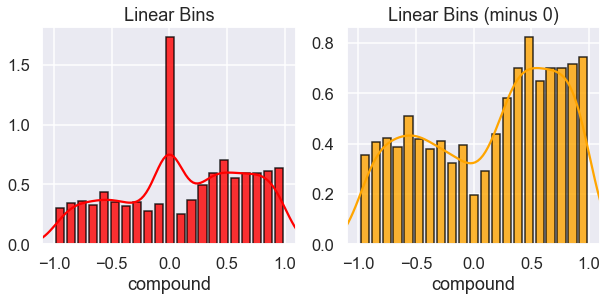

In [18]:
df = pd.DataFrame.from_records(results)
df.head()
plot_figures(df)

From the figure above, its essentially a trimodal distribution, but if you exclude the 0 (or neutral sentiments), then the bimodal distribution lends itself to spliting at +/- 0.3. A positive value will be given a +1 score and a negative value will be -1

In [19]:
df=bool_sent(df, 0.3)

C:\Users\quant\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\quant\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


What are examples of some of the positives and negative comments?

In [20]:
pprint("Positive Sentiments:")
pprint(list(df[df['Plus_Minus']==1]['Measure'])[25:27], width=200)

'Positive Sentiments:'
['I agree, P&Z+N really didnt get anything that was needed', "If you go to store>purchases there's a refund option.\n\nDon't take the nerfs too hard though. Karma is still good"]


In [21]:
pprint("Negative Sentiments:")
pprint(list(df[df['Plus_Minus']==-1]['Measure'])[25:27], width=200)

'Negative Sentiments:'
["Going vs Control and not playing the game because every move you do is countered also isn't fun.\n\nAggro is needed in this game, else Control gets greedier and greedier.",
 'Am I reading the same patch note as everyone else? Like I keep seeing "Midrange is dead" but like Bannerman never ran Stand Alone anyway so that card getting nerfed into oblivion is irrelevant for '
 'that.\n'
 '\n'
 "And the other 2 cards were two most bullshit, over tuned, never should have printed at their value points anyway cards. I think the only real nerf is that you can't run Vi in Bannerman anymore but "
 "that doesn't matter because Garen is a card.\n"
 '\n'
 'Grizzled Ranger was a double attack 4 attack card that would summon a 4/4 on death for 4 mana in a region with no good 4 drop options. Ranger still gets run in Bannerman I Garentee it.\n'
 '\n'
 "Badger Bear probably should have gotten printed as 3/4. At this point it's balanced not over powered they didn't nerf it out like

In [22]:
sentiment_count(df)

Count of Sentiments:

 1    1013
 0     815
-1     579
Name: Plus_Minus, dtype: int64


Count of Sentiments (%):

 1    42.085584
 0    33.859576
-1    24.054840
Name: Plus_Minus, dtype: float64


Based on the sentiment analysis, overwhelmingly (by a factor 2:1), the sentiment is postive. However, the neutral headlines could be better characterized as it alone accounts for 1/3 of the data set results. This begs the question, do statistics improve dramatically, if I were to perform the sentiment analysis on sentences or individual words?

Create a checkpoint file by writing to csv

In [23]:
df2 = df[['Measure', 'Plus_Minus']]
checkpt('Reddit_LoR_labels_comment', df2)

File Reddit_LoR_labels_comment Produced.


------------- 

#### Lets do sentiment Analysis on the sentences

In [24]:
paragraph = str(sentiments)

This tokenizer segments the commetns above into sentences

In [25]:
tokenizer = tokenize.sent_tokenize
sentence_list = tokenizer(paragraph)

In [26]:
results2 = []

for sentence in sentence_list:
    pol_score2 = sia.polarity_scores(sentence)
    pol_score2['Measure'] = sentence
    results2.append(pol_score2)

pprint(results2[:3], width=200)

[{'Measure': '{"Riot is clueless in terms of CCG design.', 'compound': -0.3612, 'neg': 0.263, 'neu': 0.737, 'pos': 0.0},
 {'Measure': 'They refuse to learn anything from other games and insist on reinventing the wheel every patch and expansion.', 'compound': -0.296, 'neg': 0.115, 'neu': 0.885, 'pos': 0.0},
 {'Measure': '\\n\\nThey want MTG starting health, but with Hearthstone  / TES Legends power level followers.', 'compound': 0.0387, 'neg': 0.0, 'neu': 0.913, 'pos': 0.087}]


C:\Users\quant\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\quant\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Count of Sentiments:

 0    2308
 1    1773
-1    1153
Name: Plus_Minus, dtype: int64


Count of Sentiments (%):

 0    44.096293
 1    33.874666
-1    22.029041
Name: Plus_Minus, dtype: float64
File Reddit_LoR_labels_sentence Produced.


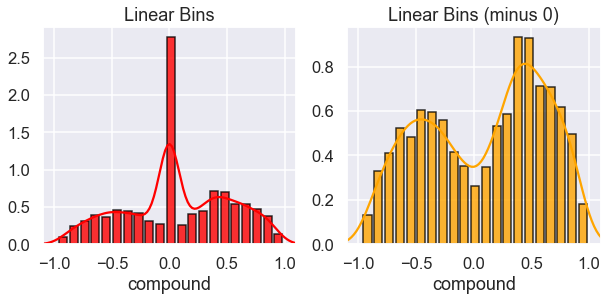

In [27]:
dfa = pd.DataFrame.from_records(results2)
dfa.head()
plot_figures(dfa) # Plot the Figures
dfa=bool_sent(dfa, 0.3) # Convert compound values to 1 or -1
sentiment_count(dfa)
df2a = dfa[['Measure', 'Plus_Minus']]
checkpt('Reddit_LoR_labels_sentence', df2a)

------------- 

#### Lets do sentiment Analysis on the words

Finally, lets remove the impact of punctuation to futher normalize the data.

In [28]:
tokenizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')

Import Stopwords i.e. words that are irrelevant for text sentiment. 

In [48]:
from string import punctuation
# All possible punctuation in a string
print('From string.punctuation:', type(punctuation), punctuation)

From string.punctuation: <class 'str'> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [63]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(type(stop_words))
stop_words_en_punc = str(stop_words).join(punctuation)
print(stop_words_en_punc[:10])

<class 'list'>
!['i', 'me


In [64]:
# Function to split every line into seperate words, removing the stop words
def process_text(lines):
    tokens = []
    for line in lines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words_en_punc]
        tokens.extend(toks)
    
    return tokens

In [65]:
paragraph_new = list(sentiments)
pos_tokens = process_text(paragraph_new)
pprint(pos_tokens[:10], width=200)

['riot', 'clueless', 'terms', 'ccg', 'design', 'refuse', 'learn', 'anything', 'games', 'insist']


In [66]:
results3 = []

for token in pos_tokens:
    pol_score3 = sia.polarity_scores(token)
    pol_score3['Measure'] = token
    results3.append(pol_score3)

pprint(results3[:3], width=200)

[{'Measure': 'riot', 'compound': -0.5574, 'neg': 1.0, 'neu': 0.0, 'pos': 0.0},
 {'Measure': 'clueless', 'compound': -0.3612, 'neg': 1.0, 'neu': 0.0, 'pos': 0.0},
 {'Measure': 'terms', 'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}]


C:\Users\quant\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\quant\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\quant\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Count of Sentiments:

 0    48036
 1     4914
-1     3127
Name: Plus_Minus, dtype: int64


Count of Sentiments (%):

 0    85.660788
 1     8.762951
-1     5.576261
Name: Plus_Minus, dtype: float64
File Reddit_LoR_labels_word Produced.


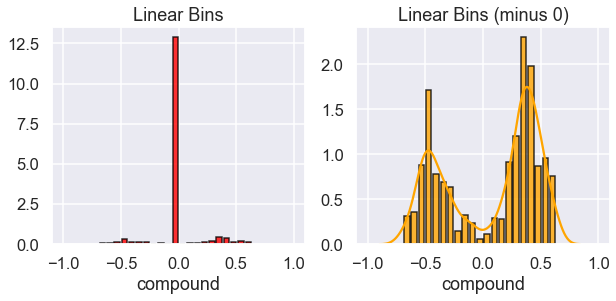

In [67]:
dfb = pd.DataFrame.from_records(results3)
dfb.head()
plot_figures(dfb) # Plot the Figures
dfb=bool_sent(dfb, 0.3) # Convert compound values to 1 or -1
sentiment_count(dfb) # Count of the Sentiments
df2b = dfb[['Measure', 'Plus_Minus']]
checkpt('Reddit_LoR_labels_word', df2b)

It looks like there is no major difference between the paragraphs and sentence sentiment analysis (they differ by 10%). However, the single word sentiment analysis does not do well, with a lot of words characterized as neutral. Still, I can analyze the individual words as a word cloud as well as a frequency distribution.

In [77]:
dfb.head()

,neg,neu,pos,compound,Measure,Plus_Minus
0,1.0,0.0,0.0,-0.5574,riot,-1
1,1.0,0.0,0.0,-0.3612,clueless,-1
2,0.0,1.0,0.0,0.0000,terms,0
3,0.0,1.0,0.0,0.0000,ccg,0
4,0.0,1.0,0.0,0.0000,design,0


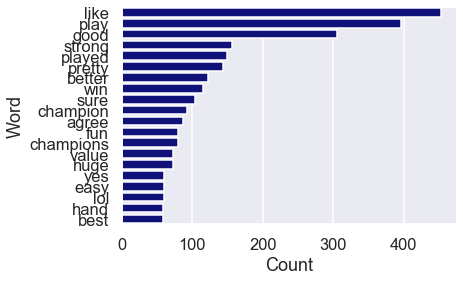

In [143]:
pwords = post_words(dfb, 20, 1)
df_pwords = pd.DataFrame(pwords, columns=['Word', 'Count'])
df_pwords
sns.barplot(x="Count", y="Word", data=df_pwords,
            label="Positve Words", color="darkblue", )

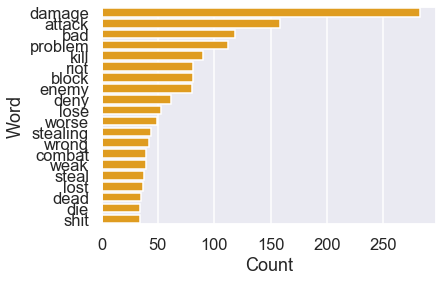

In [144]:
nwords = post_words(dfb, 20, -1)
df_nwords = pd.DataFrame(nwords, columns=['Word', 'Count'])
df_pwords
sns.barplot(x="Count", y="Word", data=df_nwords,
            label="Positve Words", color="orange")

In [145]:
checkpt('Reddit_LoR_labels_pos_words', df_pwords)
checkpt('Reddit_LoR_labels_neg_words', df_nwords)

File Reddit_LoR_labels_pos_words Produced.
File Reddit_LoR_labels_neg_words Produced.


#### Create word clouds

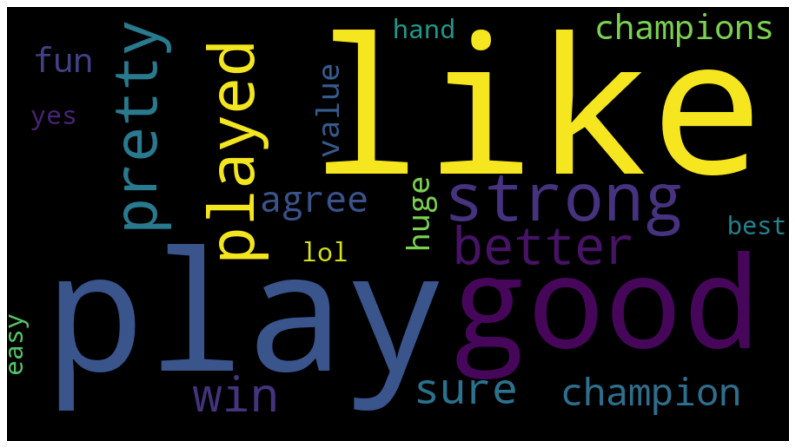

In [187]:
from wordcloud import WordCloud, STOPWORDS
import csv

file = open('Reddit_LoR_labels_pos_words.csv', 'r',newline='\n')
reader = csv.reader(file)
next(reader)
d = {}
for k,v in reader:
    d[k] = int(v)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
    
# Generating wordcloud. 
# Relative scaling value is to adjust the 
# importance of a frequency word.
wordcloud = WordCloud(
    width=900, 
    height=500, 
    max_words=1628, 
    relative_scaling=1, 
    normalize_plurals=False).generate_from_frequencies(d)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

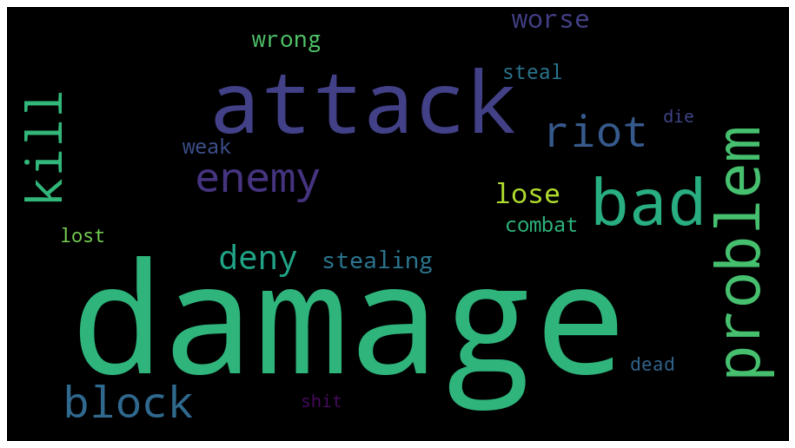

In [188]:
from wordcloud import WordCloud, STOPWORDS
import csv

file = open('Reddit_LoR_labels_neg_words.csv', 'r',newline='\n')
reader = csv.reader(file)
next(reader)
d = {}
for k,v in reader:
    d[k] = int(v)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
    
# Generating wordcloud. 
# Relative scaling value is to adjust the 
# importance of a frequency word.
wordcloud = WordCloud(
    width=900, 
    height=500, 
    max_words=1628, 
    relative_scaling=1, 
    normalize_plurals=False).generate_from_frequencies(d)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Combining the word cloud with the frequency distribution, one can see that in general, there was a favourable response to LoR. It is also no surprise thatwords like 'attacked' or 'damaged' showed up often; it can be postulated that in a game such as this, that any sort of action to the detriment of the player will de discussed heavily and negatively.

In [165]:
count = 'Completed Process'
elapsed = (time.time() - start)
print ("%s in %s seconds" % (count,elapsed))

Completed Process in 6407.960485696793 seconds
